In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!mkdir figures

/Users/jacobhawkins/.zshenv:.:1: no such file or directory: /Users/jacobhawkins/.cargo/env


In [66]:
data = pd.read_csv('server/experiment_data.csv')
display(data.head(5))

bounds = {
    'inertia': {
        'start': 0,
        'stop': 99,
    },
    'cognition': {
        'start': 100,
        'stop': 499,
    },
    'social': {
        'start': 500,
        'stop': 899,
    },
}

,iteration,inertia,cognition,social,average_distance,timeout,total_steps
0,0,0.1,1.0,1.0,5.401338,False,72
1,1,0.1,1.0,1.0,5.485600,False,71
2,2,0.1,1.0,1.0,5.396054,False,73
3,3,0.1,1.0,1.0,5.631976,False,73
4,4,0.1,1.0,1.0,5.603643,False,74


In [67]:
def create_graph(param, min, max):
    plt.clf()
    df = data.loc[min:max].reset_index()

    # y-axis = average_distance
    # x-axis = changing parameter
    ax = sns.lineplot(x=df[param], y=df['average_distance'])
    ax.set_title(f'average_distance vs. {param}')
    plt.savefig(f'figures/{param}.png')
    

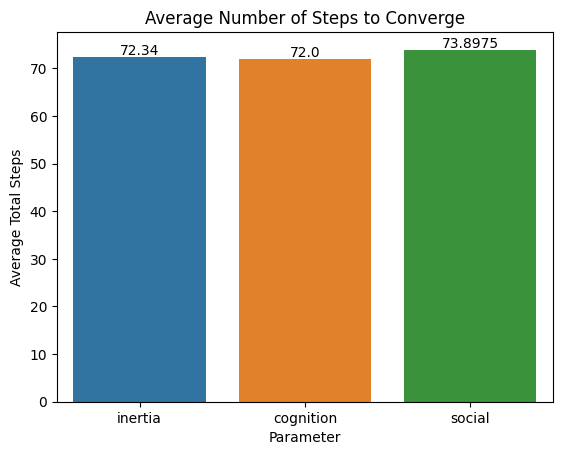

In [81]:
# bar graph with average number of iterations to converge per parameter
def make_bar_graph(bounds):
    means = []
    parameters = ['inertia', 'cognition', 'social']
    for i in parameters:
        means.append(data.loc[bounds[i]['start']:bounds[i]['stop']]['total_steps'].mean())
    
    df = pd.DataFrame({
        'Parameter': parameters,
        'Average Total Steps': means,
    })

    ax = sns.barplot(x='Parameter', y='Average Total Steps', data=df, hue='Parameter')
    for index, value in enumerate(df['Average Total Steps']):
        ax.text(index, value + 0.5, str(value), ha='center')

    ax.set_title('Average Number of Steps to Converge')
    plt.savefig('figures/bar.png')

make_bar_graph(bounds)

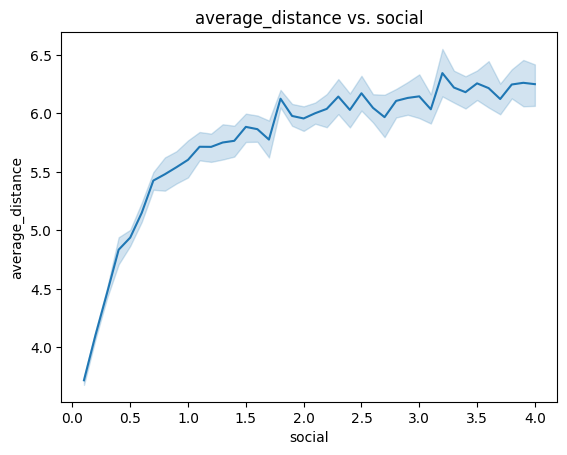

In [41]:
# individual line graphs
for i in ['inertia', 'cognition', 'social']:
    create_graph(i, bounds[i]['start'], bounds[i]['stop'])


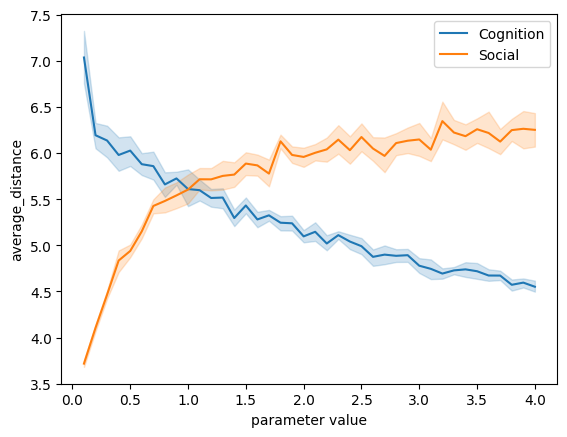

In [64]:
# combined line graph
combined = pd.DataFrame(columns=['cognition', 'cognition_dist', 'social', 'social_dist'])
for i in ['cognition', 'social']:
    df = data.loc[bounds[i]['start']:bounds[i]['stop']].reset_index()
    combined[i] = df[i]
    combined[f'{i}_dist'] = df['average_distance']

ax = sns.lineplot(x=combined['cognition'], y=combined['cognition_dist'], label='Cognition')
ax = sns.lineplot(x=combined['social'], y=combined['social_dist'], label='Social')

ax.set_xlabel('parameter value')
ax.set_ylabel('average_distance')
plt.savefig(f'figures/cognition_social.png')

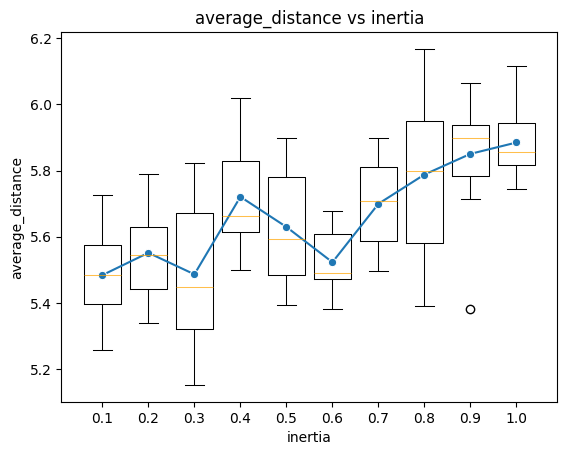

In [85]:
df = data.loc[bounds['inertia']['start']:bounds['inertia']['stop']].reset_index()
means = []

for i in [x/10 for x in range(1, 11)]:
    means.append([str(i), df[df['inertia'] == i]['average_distance'].mean()])
m = pd.DataFrame(means, columns=['parameter', 'mean'])

ax = sns.boxplot(data=df, x='inertia', y='average_distance', fill=False, color='black', medianprops=dict(color="orange", alpha=0.7), linewidth=0.75)
ax1 = sns.lineplot(data=m, x='parameter', y='mean', marker='o')

ax.set_title('average_distance vs inertia')
plt.savefig('figures/boxplot_inertia.png')